In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from bfuncs import clean_pcts
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('./data/2019/All_Seasons_Data.csv')

In [4]:
for i in ['BB%', 'K%']:
    data[i] = data[i].apply(clean_pcts)
    print(data[i][-10:])

89874    0.221
89875    0.209
89876    0.152
89877    0.267
89878    0.139
89879    0.324
89880    0.198
89881    0.244
89882    0.209
89883    0.243
Name: BB%, dtype: float64
89874    0.117
89875    0.119
89876    0.117
89877    0.140
89878    0.050
89879    0.077
89880    0.129
89881    0.130
89882    0.117
89883    0.133
Name: K%, dtype: float64


In [5]:
data.loc[89878]

Season                1924
Name        Rogers Hornsby
Team             Cardinals
G                      143
PA                     640
HR                      25
R                      121
RBI                     94
SB                       5
BB%                  0.139
K%                    0.05
ISO                  0.272
BABIP                0.422
AVG                  0.424
OBP                  0.507
SLG                  0.696
wOBA                 0.537
wRC+                   221
BsR                     -2
Off                   94.2
Def                   11.4
WAR                   12.5
playerid           1006030
Name: 89878, dtype: object

In [6]:
print(plt.style.available)
print(sns.axes_style())
plt.style.use('seaborn-whitegrid')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']
{'axes.facecolor': 'white', 'axes.edgecolor': 'black', 'axes.grid': False, 'axes.axisbelow': 'line', 'axes.labelcolor': 'black', 'figure.facecolor': (1, 1, 1, 0), 'grid.color': '#b0b0b0', 'grid.linestyle': '-', 'text.color': 'black', 'xtick.color': 'black', 'ytick.color': 'black', 'xtick.direction': 'out', 'ytick.direction': 'out', 'lines.solid_capstyle': 'projecting', 'patch.edgecolor': 'black', 'image.cmap': 'viridis', 'font.family': ['sans-serif'], 'font.sans-serif': ['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Ve

13037


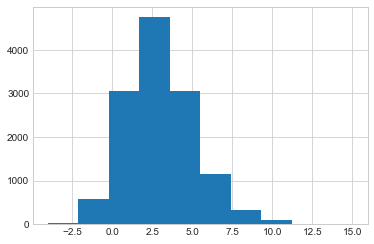

In [7]:
qual = 502
mask = data['PA'] >= qual
print(len(data[mask]))
plt.hist(data[mask]['WAR']);

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


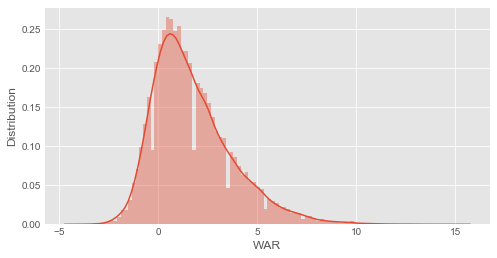

In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(8,4))
sns.distplot(data[data['PA'] >= 200]['WAR'], bins=100)
#plt.grid()
plt.ylabel('Distribution');

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


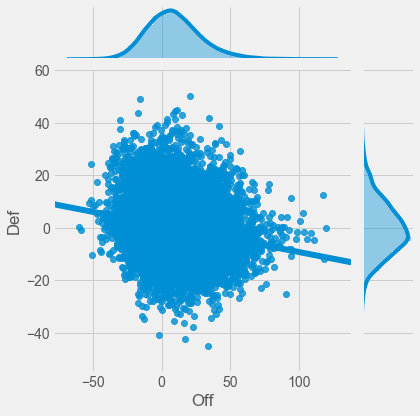

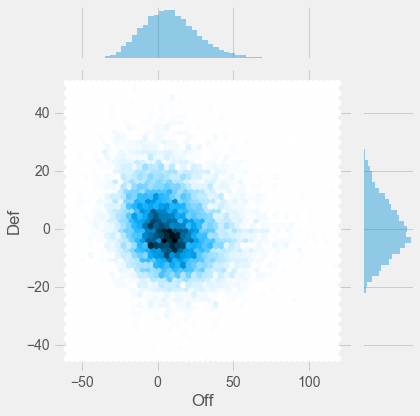

In [9]:
plt.style.use('fivethirtyeight')
#fg = sns.FacetGrid(data=data[mask], hue='WAR')
#fg.map(sns.jointplot, 'Off', 'Def')
sns.jointplot(data=data[mask], x='Off', y='Def', kind='reg')
sns.jointplot(data=data[mask], x='Off', y='Def', kind='hex')

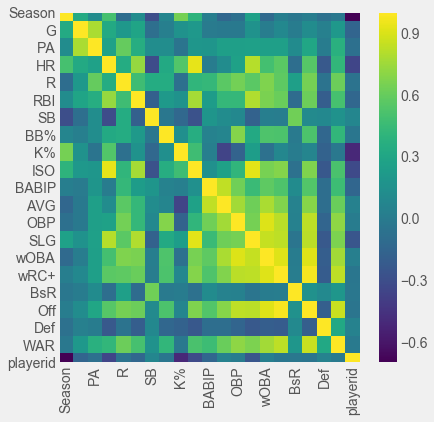

In [10]:
plt.figure(figsize=(6,6))
sns.heatmap(data[mask].corr(), cmap='viridis')

In [11]:
# way too big as there are too many variables, much that don't matter
#sns.pairplot(data[mask], )

In [12]:
qual_data = data[mask][['G', 'PA', 'HR', 'R', 'RBI', 'SB', 'BB%',
       'K%', 'ISO', 'BABIP', 'AVG', 'OBP', 'SLG', 'wOBA', 'wRC+', 'BsR', 'Off',
       'Def', 'WAR', 'playerid']].copy()

In [13]:
qual_data.describe()

,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR,playerid
count,13037.000000,13037.000000,13037.000000,13037.000000,13037.000000,13015.000000,13037.000000,11876.000000,13037.000000,11876.000000,13037.000000,13037.000000,13037.000000,13037.000000,13037.000000,13037.000000,13037.000000,13037.000000,13037.000000,1.303700e+04
mean,143.714428,605.243231,13.435300,79.666948,71.702846,14.130311,0.089727,0.117070,0.143897,0.300579,0.281156,0.349969,0.425044,0.350160,111.035975,0.325911,9.010723,0.089476,2.968727,7.284853e+05
std,11.147660,60.161991,11.151777,20.955702,24.931374,15.029296,0.035012,0.058654,0.063292,0.031664,0.031691,0.039749,0.078123,0.043236,25.602243,2.660965,19.914890,10.703418,2.154196,4.496942e+05
min,104.000000,502.000000,0.000000,25.000000,0.000000,0.000000,0.009000,0.005000,0.018000,0.182000,0.168000,0.222000,0.225000,0.210000,23.000000,-12.600000,-60.100000,-44.800000,-4.000000,2.000000e+00
25%,136.000000,556.000000,4.000000,65.000000,53.000000,3.000000,0.064000,0.072000,0.095000,0.279000,0.260000,0.323000,0.370000,0.321000,93.000000,-1.000000,-4.600000,-7.100000,1.500000,9.205000e+03
50%,145.000000,604.000000,11.000000,77.000000,69.000000,9.000000,0.086000,0.110000,0.135000,0.299000,0.279000,0.348000,0.419000,0.347000,110.000000,0.100000,7.400000,-0.800000,2.800000,1.004264e+06
75%,153.000000,652.000000,21.000000,92.000000,88.000000,20.000000,0.111000,0.154000,0.184000,0.321000,0.301000,0.374000,0.473000,0.376000,127.000000,1.300000,20.600000,6.800000,4.300000,1.009359e+06
max,165.000000,778.000000,73.000000,192.000000,191.000000,138.000000,0.376000,0.372000,0.536000,0.433000,0.440000,0.609000,0.863000,0.598000,244.000000,17.700000,119.200000,50.100000,15.000000,1.014467e+06


In [14]:
pgp = qual_data.groupby('playerid')
pgp.sum()

,G,PA,HR,R,RBI,SB,BB%,K%,ISO,BABIP,AVG,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR
playerid,,,,,,,,,,,,,,,,,,,
2,1817,7676,239,902,1128.0,70.0,0.549,1.561,2.012,3.706,3.505,3.866,5.517,3.998,1185.0,-5.5,-13.9,-46.0,20.2
10,984,4353,29,562,305.0,103.0,0.471,0.534,0.525,2.081,1.952,2.418,2.475,2.204,637.0,12.2,-31.7,32.3,14.5
11,1156,5171,106,741,583.0,157.0,0.583,1.098,1.075,2.557,2.312,2.745,3.387,2.674,792.0,19.4,18.3,64.0,25.7
13,419,1644,63,205,260.0,14.0,0.194,0.412,0.605,0.876,0.842,0.993,1.448,1.037,314.0,-1.1,8.5,-39.1,2.3
15,1083,4593,249,656,700.0,46.0,0.965,1.508,1.754,1.969,1.804,2.544,3.556,2.612,865.0,2.5,145.0,15.5,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014432,578,2460,133,328,430.0,11.0,0.369,0.614,0.911,1.112,1.094,1.377,2.006,1.523,481.0,1.5,64.6,-26.8,12.2
1014442,128,512,13,57,40.0,5.0,0.049,0.137,0.151,0.271,0.252,0.291,0.403,0.306,80.0,0.7,-12.0,-1.3,0.4
1014444,997,4082,50,521,613.0,137.0,0.319,0.539,0.970,2.268,2.136,2.401,3.107,2.612,881.0,-3.3,122.6,25.8,30.4


In [15]:
#player_szn = qual_data.groupby(['playerid', 'Season'])

In [16]:
import numpy as np
cov_qual_mat = pd.DataFrame(np.cov(qual_data))


In [17]:
qual_data.shape

(13037, 20)

In [18]:
n = 4
m = 5
A = np.random.rand(n*m).reshape(4,5)*100
A

array([[90.15270029, 61.39534428, 18.48722852, 15.70984982, 26.09728823],
       [30.78846927, 11.91084929, 37.96609437, 25.66942256, 24.54717304],
       [ 4.56272753, 38.64270652, 98.37031819, 37.96235125, 48.53389363],
       [79.29091337, 83.18546338, 41.15885268, 88.55448161, 66.49750123]])

In [19]:
a = A - np.matmul(np.eye(n,n), A*(1/n))
a

array([[67.61452522, 46.04650821, 13.86542139, 11.78238737, 19.57296617],
       [23.09135195,  8.93313697, 28.47457078, 19.25206692, 18.41037978],
       [ 3.42204565, 28.98202989, 73.77773864, 28.47176344, 36.40042022],
       [59.46818503, 62.38909753, 30.86913951, 66.41586121, 49.87312592]])

In [20]:
print(a.T.shape, 'x',a.shape)
ata = np.matmul(a.T, a)

(5, 4) x (4, 5)


In [21]:
ata

array([[8653.10998255, 7129.03522562, 3683.222709  , 5288.27917791,
        4838.96555393],
       [7129.03522562, 6932.43940231, 4956.94786288, 5683.31428902,
        5232.22657636],
       [3683.222709  , 4956.94786288, 7399.10958456, 4862.34491499,
        5020.6962577 ],
       [5288.27917791, 5683.31428902, 4862.34491499, 5731.174666  ,
        4933.80489596],
       [4838.96555393, 5232.22657636, 5020.6962577 , 4933.80489596,
        4534.36237041]])

In [22]:
V = ata / n
V

array([[2163.27749564, 1782.25880641,  920.80567725, 1322.06979448,
        1209.74138848],
       [1782.25880641, 1733.10985058, 1239.23696572, 1420.82857226,
        1308.05664409],
       [ 920.80567725, 1239.23696572, 1849.77739614, 1215.58622875,
        1255.17406442],
       [1322.06979448, 1420.82857226, 1215.58622875, 1432.7936665 ,
        1233.45122399],
       [1209.74138848, 1308.05664409, 1255.17406442, 1233.45122399,
        1133.5905926 ]])

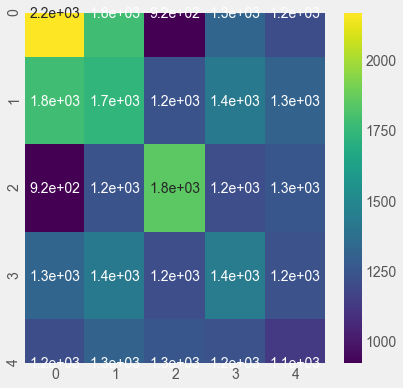

In [23]:
plt.figure(figsize=(6, 6))
sns.heatmap(V, cmap='viridis',annot=True);

In [24]:
A = pd.DataFrame(A, columns=['stat%a' % i for i in range(A.shape[1]) ])

In [25]:
ones = np.ones((n,1))
means = ones @ ones.T @ (A * (1/n)) 
dev = A - means
print(A)
print(means)
print(dev)
print(dev.__class__)

       stat0      stat1      stat2      stat3      stat4
0  90.152700  61.395344  18.487229  15.709850  26.097288
1  30.788469  11.910849  37.966094  25.669423  24.547173
2   4.562728  38.642707  98.370318  37.962351  48.533894
3  79.290913  83.185463  41.158853  88.554482  66.497501
       stat0      stat1      stat2      stat3      stat4
0  51.198703  48.783591  48.995623  41.974026  41.418964
1  51.198703  48.783591  48.995623  41.974026  41.418964
2  51.198703  48.783591  48.995623  41.974026  41.418964
3  51.198703  48.783591  48.995623  41.974026  41.418964
       stat0      stat1      stat2      stat3      stat4
0  38.953998  12.611753 -30.508395 -26.264176 -15.321676
1 -20.410233 -36.872742 -11.029529 -16.304604 -16.871791
2 -46.635975 -10.140884  49.374695  -4.011675   7.114930
3  28.092211  34.401873  -7.836771  46.580455  25.078537
<class 'pandas.core.frame.DataFrame'>


In [26]:
np.mean(A.iloc[:,0]) == means.iloc[0,0]

True

In [27]:
cross = A.T @ A
cross

,stat0,stat1,stat2,stat3,stat4
stat0,15383.306636,12673.840401,6547.951483,9401.385205,8602.605429
stat1,12673.840401,12324.336715,8812.351756,10103.669847,9301.736136
stat2,6547.951483,8812.351756,13153.972595,8644.168738,8925.682236
stat3,9401.385205,10103.669847,8644.168738,10188.754962,8771.208704
stat4,8602.605429,9301.736136,8925.682236,8771.208704,8061.088659


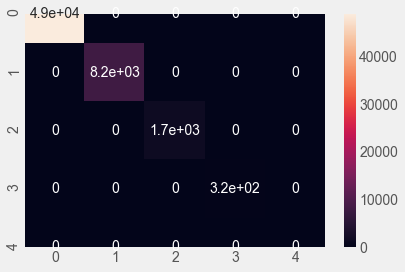

In [29]:
eigvals, eigvecs = np.linalg.eig(A.T @ A)
sns.heatmap(np.diag(np.round(eigvals, 3)), annot=True)

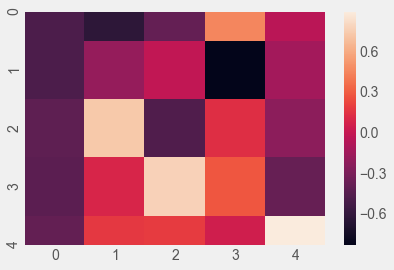

In [30]:
sns.heatmap(eigvecs)

In [34]:
x = np.arange(4)
pb = np.array([.125, .375, .375, .125])
np.dot(x, pb)

1.5

In [38]:
sum(x.T * pb)

1.5

In [41]:
x2 = np.arange(6)
pb2 = np.array([0.1, 0.2, 0.3, 0.3, 0.05, 0.05])

In [42]:
np.dot(x2, pb2)

2.15

In [44]:
pb3 = np.array([.35, .35, .15, .15])
exp3 = np.dot(x, pb3)

In [46]:
var = np.dot(x**2, pb3) - exp3**2
var

1.09

In [47]:
sdev = np.sqrt(var)
sdev

1.044030650891055

In [48]:
print(np.var(x))
print(np.std(x))

1.25
1.118033988749895


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


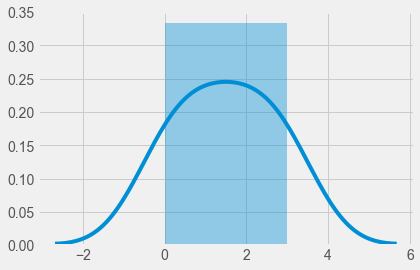

In [54]:
sns.distplot(x)

In [51]:
A

,stat0,stat1,stat2,stat3,stat4
0,90.152700,61.395344,18.487229,15.709850,26.097288
1,30.788469,11.910849,37.966094,25.669423,24.547173
2,4.562728,38.642707,98.370318,37.962351,48.533894
3,79.290913,83.185463,41.158853,88.554482,66.497501


In [52]:
A.mean()

stat0    51.198703
stat1    48.783591
stat2    48.995623
stat3    41.974026
stat4    41.418964
dtype: float64

In [53]:
A.median()

stat0    55.039691
stat1    50.019025
stat2    39.562474
stat3    31.815887
stat4    37.315591
dtype: float64

In [55]:
arr = np.array( (1, 3, 5, 7, 9, 11, 13, 15))
arr.sum()


64

In [59]:
arr_mean = arr.mean()

In [58]:
arr.max(), arr.min()

(15, 1)

In [62]:
arr_std = np.sqrt(np.sum((arr - arr_mean)**2) / (arr.shape[0] - 1))

In [65]:
print(arr_mean -  arr_std) 
print(arr_mean)
print(arr_mean +  arr_std)

3.1010205144336442
8.0
12.898979485566356


In [66]:
arr2 = np.array([2,4,6,8])

In [68]:
arr2.mean(), arr2.std()

(5.0, 2.23606797749979)

In [74]:
np.percentile(arr2, 75) - np.percentile(arr2, 25)

3.0

In [75]:
arr3 = np.array([17, 45, 3, 22, 10])

In [76]:
np.percentile(arr3, 75), np.percentile(arr3, 25)

(22.0, 10.0)

In [80]:
np.skew(arr3)

AttributeError: module 'numpy' has no attribute 'skew'

In [81]:
import scipy.stats as stats

In [83]:
stats.skew(arr3)

0.7860620674130082

In [84]:
stats.kurtosis(arr3)

-0.5751399496633334

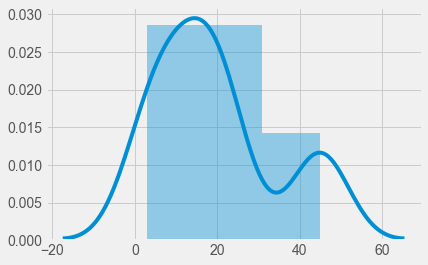

In [91]:
sns.distplot(arr3)
#plt.plot(np.median(arr3))

In [88]:
np.median(arr3)

17.0

In [92]:
arr4 = np.array([12, 17, 19, 22, 30, 65])
arr4.mean()

27.5

In [98]:
arr4 = np.array([4, 10, 16])
np.sum([(arr4 - arr4.mean())**2 / (arr4.shape[0] - 1)])

36.0

In [99]:
arr4.var(ddof=1)

36.0

In [100]:
arr5 = np.array([3, 5, 7])
arr5.std(ddof=1)

2.0

In [101]:
import scipy.optimize as optimize

In [112]:
res = optimize.minimize(lambda x: 3.5*x[0] + 0.3*x[1],  (1.3, 2.6), options={'disp': True})
#res = optimize.minimize(lambda x: 3.5*x[0] + 0.3*x[1],  [(1.3, 2.6), (1.5, 2.2)], options={'disp': True})

Optimization terminated successfully.
         Current function value: -1269865038.780749
         Iterations: 1
         Function evaluations: 64
         Gradient evaluations: 16


In [113]:
res

      fun: -1269865038.780749
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 64
      nit: 1
     njev: 16
   status: 0
  success: True
        x: array([-3.60172418e+08, -3.08719142e+07])

In [114]:
res.x

array([-3.60172418e+08, -3.08719142e+07])

In [115]:
econ = pd.DataFrame([[2.3,8],[2.5, 9],[3.6, 13]], columns=['Growth', 'S&P500Returns'])

In [116]:
econ

,Growth,S&P500Returns
0,2.3,8
1,2.5,9
2,3.6,13


In [119]:
econ.mean()

Growth            2.8
S&P500Returns    10.0
dtype: float64

In [120]:
np.cov(econ)

array([[16.245, 18.525, 26.79 ],
       [18.525, 21.125, 30.55 ],
       [26.79 , 30.55 , 44.18 ]])

In [121]:
np.corrcoef(econ)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [122]:
x = [6,7,8,9,10]
y = [7,9,11,13,15]
print(np.cov(x, y))
print(np.corrcoef(x,y))

[[ 2.5  5. ]
 [ 5.  10. ]]
[[1. 1.]
 [1. 1.]]


In [123]:
arr = np.array([[1.2,4.0],
[1.8, 5.0],
[3.0, 9.0]])

In [131]:
np.cov(arr)

array([[ 3.92,  4.48,  8.4 ],
       [ 4.48,  5.12,  9.6 ],
       [ 8.4 ,  9.6 , 18.  ]])

In [134]:
stats.__dir__()

['__name__',
 '__doc__',
 '__package__',
 '__loader__',
 '__spec__',
 '__path__',
 '__file__',
 '__cached__',
 '__builtins__',
 'division',
 'print_function',
 'absolute_import',
 '_distr_params',
 '_constants',
 '_distn_infrastructure',
 '_stats',
 '_tukeylambda_stats',
 '_continuous_distns',
 '_discrete_distns',
 'distributions',
 '_stats_mstats_common',
 'mstats_basic',
 'stats',
 'find_repeats',
 'gmean',
 'hmean',
 'mode',
 'tmean',
 'tvar',
 'tmin',
 'tmax',
 'tstd',
 'tsem',
 'moment',
 'variation',
 'skew',
 'kurtosis',
 'describe',
 'skewtest',
 'kurtosistest',
 'normaltest',
 'jarque_bera',
 'itemfreq',
 'scoreatpercentile',
 'percentileofscore',
 'cumfreq',
 'relfreq',
 'obrientransform',
 'sem',
 'zmap',
 'zscore',
 'iqr',
 'sigmaclip',
 'trimboth',
 'trim1',
 'trim_mean',
 'f_oneway',
 'pearsonr',
 'fisher_exact',
 'spearmanr',
 'pointbiserialr',
 'kendalltau',
 'weightedtau',
 'linregress',
 'theilslopes',
 'ttest_1samp',
 'ttest_ind',
 'ttest_ind_from_stats',
 'ttest_rel

In [135]:
.4 / (1 - .4)

0.6666666666666667

In [137]:
.15 / .67

0.22388059701492535

In [138]:
(.9 * .5) + (.8 * .5)

0.8500000000000001

In [139]:
(.9 * .5) / .85

0.5294117647058824

In [141]:
.07 / .2

0.35000000000000003

In [142]:
(.95 * .75) + (.85 * .25)

0.9249999999999999

In [143]:
(.95 * .75) / ((.95 * .75) + (.85 * .25))

0.7702702702702702

In [158]:
import scipy
def combinations(x, y):
    return scipy.special.factorial(x) / (scipy.special.factorial(x - y) * scipy.special.factorial(y))

In [159]:
def permutations(x, y):
    return scipy.special.factorial(x) / scipy.special.factorial(x - y) 

In [163]:
print('%f' % permutations(52, 5))
print('%f'%combinations(52, 5))

311875200.000000
2598960.000000


In [183]:
def comb_prob(x, nx,y, ny):
    xcombs = combinations(nx,x)
    ycombs = combinations(ny,y)
    xycombs = combinations(nx + ny, x+ y)
    print(xcombs * ycombs)
    return (xcombs * ycombs) / xycombs

In [174]:
def perm_prob(x, nx,y, ny):
    xperms = permutations(nx,x)
    yperms = permutations(ny,y)
    xyperms = permutations(nx + ny, x+ y)
    return (xperms * yperms) / xyperms

In [175]:
comb_prob(2, 30, 3, 20) *100

23.405199267496084

In [176]:
comb_prob(3, 15, 5, 10) * 100

10.601206573746621

In [178]:
perm_prob(1, 20, 2, 30) * 100

14.795918367346944

In [180]:
permutations(6, 4)

360.0

In [182]:
combinations(26, 4)

14950.000000000004

In [214]:
print(combinations(15, 3) * combinations(18, 5))
print(comb_prob(3, 15, 5, 18))

3898440.0
3898440.0
0.2807833619846967


In [188]:
arr_str = np.array([1, 2, 3, 1, 2, 4])

In [189]:
from sklearn.preprocessing import OneHotEncoder

In [191]:
#enc = OneHotEncoder()
#enc.fit(arr_str)

In [192]:
np.linalg.__dir__()

['__name__',
 '__doc__',
 '__package__',
 '__loader__',
 '__spec__',
 '__path__',
 '__file__',
 '__cached__',
 '__builtins__',
 'division',
 'absolute_import',
 'print_function',
 'info',
 'lapack_lite',
 '_umath_linalg',
 'linalg',
 'matrix_power',
 'solve',
 'tensorsolve',
 'tensorinv',
 'inv',
 'cholesky',
 'eigvals',
 'eigvalsh',
 'pinv',
 'slogdet',
 'det',
 'svd',
 'eig',
 'eigh',
 'lstsq',
 'norm',
 'qr',
 'cond',
 'matrix_rank',
 'LinAlgError',
 'multi_dot',
 'test']

In [193]:
np.sqrt(np.sum(arr**2))

11.64817582284883

In [194]:
z = np.array([-1, 1, 3, 5])

In [195]:
np.sqrt(np.sum(z**2))

6.0

In [196]:
np.linalg.norm(z)

6.0

In [198]:
znormed = z / np.linalg.norm(z)
np.sqrt(np.sum(znormed**2))

1.0

In [199]:
np.linalg.norm(znormed)

1.0

In [200]:
np.linalg.norm((3, 4))

5.0

In [202]:
x=(3,-2,5)
y=(4,11,2)

In [203]:
np.dot(x, y)

0

In [205]:
0.5 * np.array([8,10,2,2]).reshape(2,2) - np.array([5, 2, 1, -3]).reshape(2,2)

array([[-1.,  3.],
       [ 0.,  4.]])

In [209]:
np.array([[1,2, 3],[4, 5, 6]]) @ np.array([[1,3, 5],[2, 4, 6]]).T

array([[22, 28],
       [49, 64]])

In [210]:
%whos

Variable        Type                Data/Info
---------------------------------------------
A               DataFrame                  stat0      stat1  <...>853  88.554482  66.497501
OneHotEncoder   type                <class 'sklearn.preproces<...>sing.data.OneHotEncoder'>
V               ndarray             5x5: 25 elems, type `float64`, 200 bytes
a               ndarray             4x5: 20 elems, type `float64`, 160 bytes
arr             ndarray             3x2: 6 elems, type `float64`, 48 bytes
arr2            ndarray             4: 4 elems, type `int32`, 16 bytes
arr3            ndarray             5: 5 elems, type `int32`, 20 bytes
arr4            ndarray             3: 3 elems, type `int32`, 12 bytes
arr5            ndarray             3: 3 elems, type `int32`, 12 bytes
arr_mean        float64             8.0
arr_std         float64             4.898979485566356
arr_str         ndarray             6: 6 elems, type `int32`, 24 bytes
ata             ndarray             5x5: 25 el